In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("/content/drive/My Drive/Data"))

# Any results you write to the current directory are saved as output.

['train', 'test']


In [43]:
train_normal = "/content/drive/My Drive/Data/train/NORMAL"
train_pneumonia= "/content/drive/My Drive/Data/train/PNEUMONIA"
train_covid="/content/drive/My Drive/Data/train/COVID19"
test_normal= "/content/drive/My Drive/Data/test/NORMAL"
test_pneumonia= "/content/drive/My Drive/Data/test/PNEUMONIA"
test_covid="/content/drive/My Drive/Data/test/COVID19"
image_size = 128


100%|██████████| 1266/1266 [00:33<00:00, 38.13it/s]

100%|██████████| 3418/3418 [00:38<00:00, 89.01it/s]

100%|██████████| 460/460 [00:15<00:00, 29.95it/s]


Text(0.5, 1.0, 'Augmented')

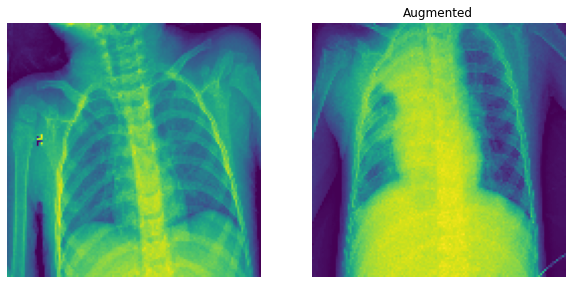

In [46]:
for image in tqdm(os.listdir(train_normal)): 
    path = os.path.join(train_normal, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)
    
for image2 in tqdm(os.listdir(train_pneumonia)): 
    path = os.path.join(train_pneumonia, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
    np_img2=np.asarray(img2)

for image3 in tqdm(os.listdir(train_covid)): 
    path = os.path.join(train_covid, image3)
    img3 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img3 = cv2.resize(img3, (image_size, image_size)).flatten() 
    np_img3=np.asarray(img3)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("Augmented")

In [55]:
def train_data():
    train_data_normal = [] 
    train_data_pneumonia=[]
    train_data_covid = [] 

    for image1 in tqdm(os.listdir(train_normal)): 
        path = os.path.join(train_normal, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        try:
          img1 = cv2.resize(img1, (image_size, image_size))
        except:
          break
        train_data_normal.append(img1) 
    for image2 in tqdm(os.listdir(train_pneumonia)): 
        path = os.path.join(train_pneumonia, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        try:
          img2 = cv2.resize(img2, (image_size, image_size))
        except:
          break
        train_data_pneumonia.append(img2) 
    for image3 in tqdm(os.listdir(train_covid)): 
        path = os.path.join(train_covid, image3)
        img3 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        try:
          img3 = cv2.resize(img3, (image_size, image_size))
        except:
          break
        train_data_covid.append(img3) 
    
    train_data= np.concatenate((np.asarray(train_data_normal),np.asarray(train_data_pneumonia),np.asarray(train_data_covid)),axis=0)
    return train_data 

In [56]:
def test_data():
    test_data_normal = [] 
    test_data_pneumonia=[]
    test_data_covid=[]

    for image1 in tqdm(os.listdir(test_normal)): 
        path = os.path.join(test_normal, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        try:
          img1 = cv2.resize(img1, (image_size, image_size))
        except:
          break
        test_data_normal.append(img1) 
    for image2 in tqdm(os.listdir(test_pneumonia)): 
        path = os.path.join(test_pneumonia, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        try:
          img2 = cv2.resize(img2, (image_size, image_size))
        except:
          break
        test_data_pneumonia.append(img2) 


    for image3 in tqdm(os.listdir(test_covid)): 
        path = os.path.join(test_covid, image3)
        img3 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        try:
          img3 = cv2.resize(img3, (image_size, image_size))
        except:
          break
        test_data_covid.append(img3) 
    
    
    test_data= np.concatenate((np.asarray(test_data_normal),np.asarray(test_data_pneumonia),np.asarray(test_data_covid)),axis=0) 
    return test_data 

In [57]:
train_data = train_data() 
test_data = test_data()


100%|██████████| 1266/1266 [00:32<00:00, 39.20it/s]

100%|██████████| 3418/3418 [00:38<00:00, 88.18it/s]

100%|██████████| 460/460 [00:15<00:00, 30.62it/s]

100%|██████████| 317/317 [00:08<00:00, 35.90it/s]

100%|██████████| 855/855 [03:54<00:00,  3.65it/s]

100%|██████████| 116/116 [02:22<00:00,  1.23s/it]


In [58]:
x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [62]:
z1 = np.zeros(1266)
o1 = np.ones(3418)
t1 = np.full((460,),2)
print(z1.shape,o1.shape,t1.shape)
Y_train = np.concatenate((o1, z1, t1), axis=0)
z = np.zeros(317)
o = np.ones(855)
t = np.full((116,),2)
print(z.shape,o.shape,t.shape)
Y_test = np.concatenate((o, z, t), axis=0)

(1266,) (3418,) (460,)
(317,) (855,) (116,)


In [63]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [64]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (6432, 128, 128)
Y shape:  (6432, 1)


In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [66]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (5467, 16384)
X test flatten (965, 16384)


In [67]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (16384, 5467)
x test:  (16384, 965)
y train:  (1, 5467)
y test:  (1, 965)


#Logistic Regression

In [68]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
        
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):

    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))

Cost after iteration 0: nan
Cost after iteration 100: nan
Cost after iteration 200: nan
Cost after iteration 300: nan
Cost after iteration 400: nan
Cost after iteration 500: nan
Cost after iteration 600: nan
Cost after iteration 700: nan
Cost after iteration 800: nan
Cost after iteration 900: nan
Cost after iteration 1000: nan
Cost after iteration 1100: nan
Cost after iteration 1200: nan
Cost after iteration 1300: nan
Cost after iteration 1400: nan


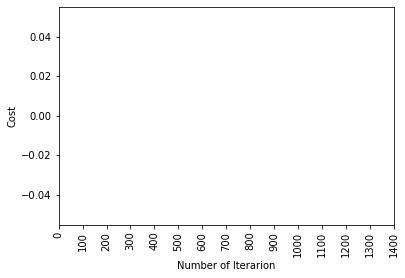

Test Accuracy: 64.66 %
Train Accuracy: 62.08 %


In [69]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 1500)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7),"penalty":["l1","l2"]},
logistic_regression=LogisticRegression(random_state=42)
log_reg_cv=GridSearchCV(logistic_regression,grid,cv=10)
log_reg_cv.fit(x_train.T,y_train.T)

KeyboardInterrupt: ignored

In [71]:
print("best hyperparameters: ", log_reg_cv.best_params_)
print("accuracy: ", log_reg_cv.best_score_)

AttributeError: ignored

In [ ]:
log_reg= LogisticRegression(C=1,penalty="l1")
log_reg.fit(x_train.T,y_train.T)
print("test accuracy: {} ".format(log_reg.fit(x_test.T, y_test.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(log_reg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))